<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/case_4_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
dataset = '/content/drive/MyDrive/Colab Notebooks/SUV_Purchase.csv'
data = pd.read_csv(dataset)

In [2]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


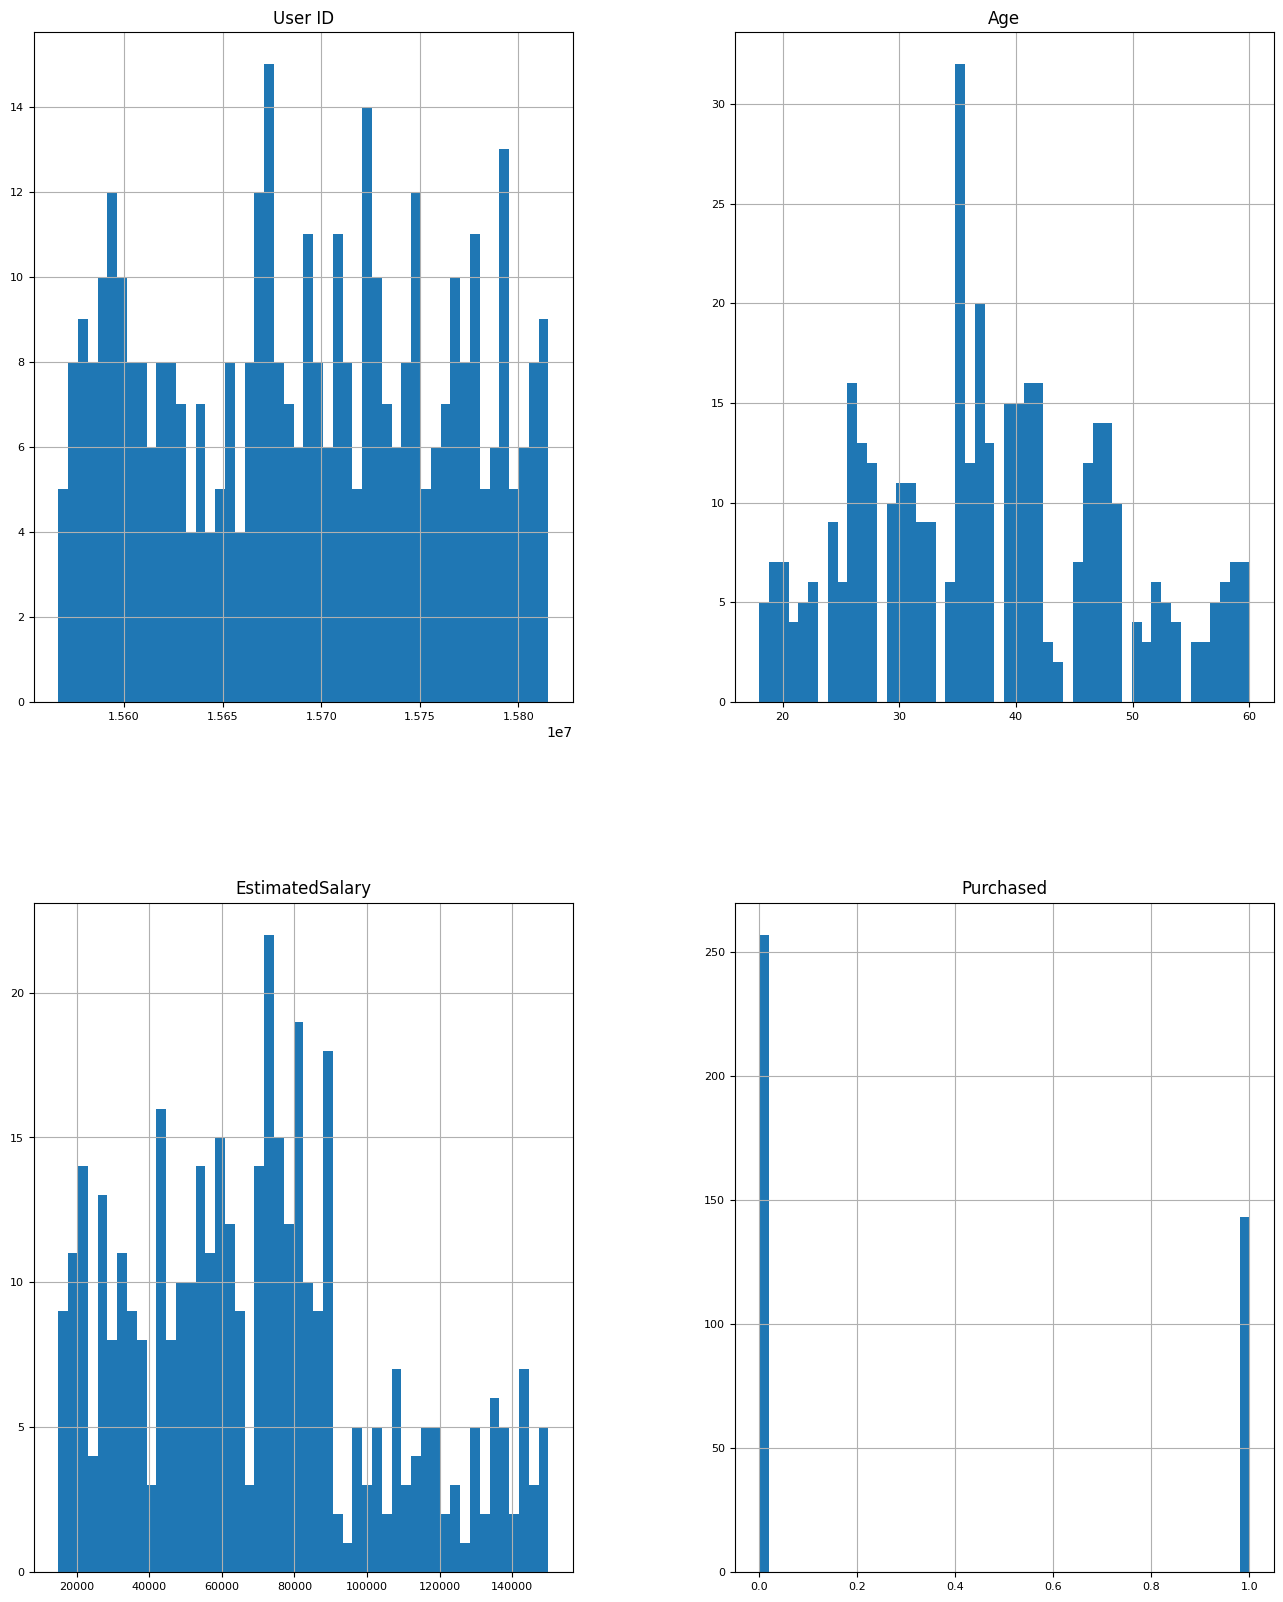

In [4]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
data.columns


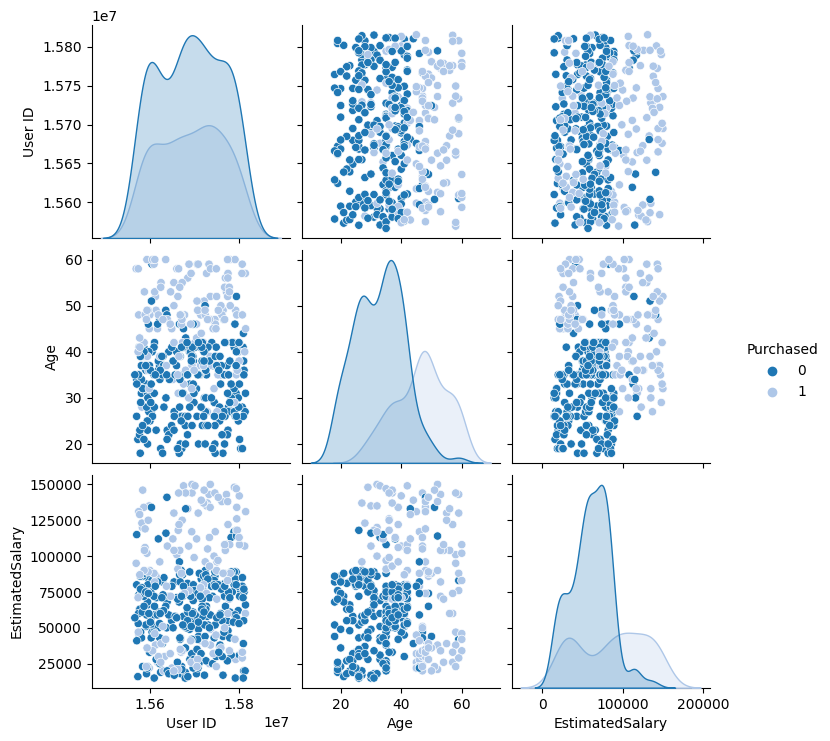

In [7]:
import seaborn as sns
sns.plotting_context('notebook')
sns.pairplot(data, hue='Purchased', palette = 'tab20')

In [ ]:
'''Before splitting the data and training a model, it's often necessary to preprocess the data.
This may include handling missing values, encoding categorical variables, or scaling numerical features.
The specific preprocessing steps depend on your dataset and the machine learning algorithm you plan to use.'''

In [9]:
#Extracting Independent and dependent Variable
X= data.iloc[:, [2,3]].values
y= data.iloc[:, 4].values

In [10]:
#preprocessing the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
X_train

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)# Feature

In [13]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
#predict the test set results
y_pred = classifier.predict(X_test)

In [59]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  1],
       [13, 20]])

<ipython-input-51-a2ea834ffb11>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


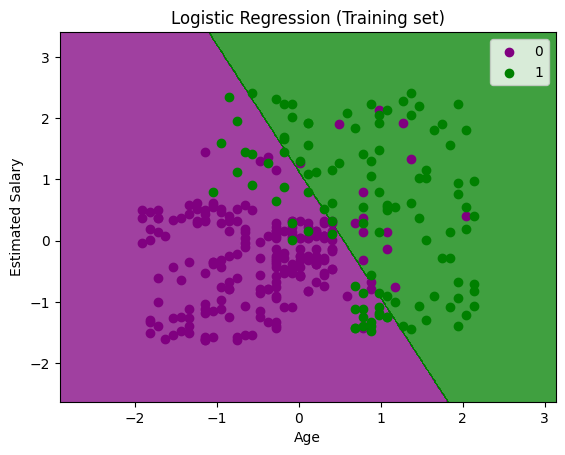

In [51]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [53]:
# Use score method to get accuracy of model
score = classifier.score(X_test, y_test)
print("Accuracy using Logistic Regression: ",score)

Accuracy using Logistic Regression:  0.825


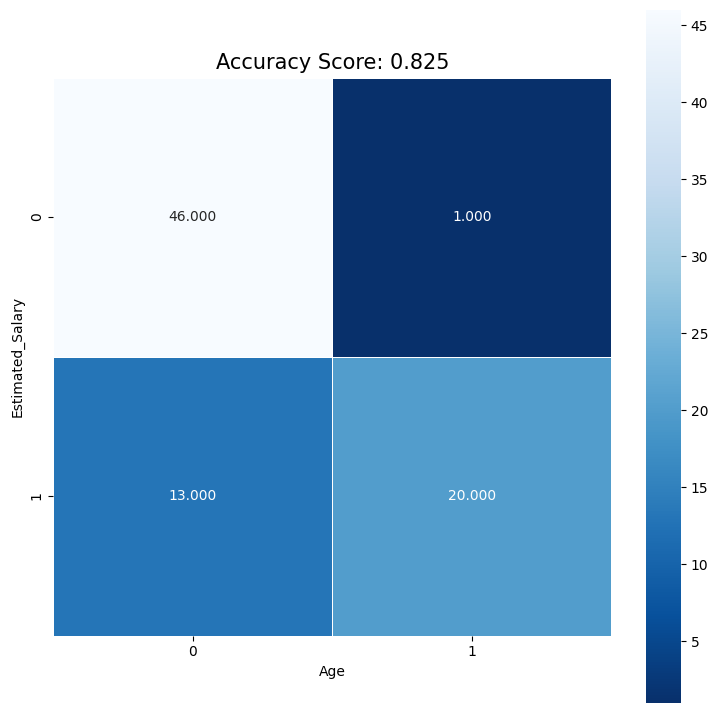

In [54]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);